In [1]:
import mcmc_velocity_profile as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import velocity_plotting_functions as p
from mcmc_velocity_profile import run_disk_model, v_corr_func_mod, residual_velocity_model
import corner
import plot_settings

plot_settings.set_plot_style("paper")  # or "dark"
%load_ext autoreload
%autoreload 2

In [2]:
data = np.load('velocity_fit_12CO.npz')
chain = data['chain']      # shape: (nsteps, nwalkers, ndim)
lnprob = data['lnprob']    # shape: (nsteps, nwalkers)

max_idx = np.unravel_index(np.argmax(lnprob), lnprob.shape)

best_params = chain[max_idx[0], max_idx[1], :]

print("Best-fit parameters (ndim =", chain.shape[2], "):")
print(best_params)
print("Max log-posterior:", lnprob[max_idx])

Best-fit parameters (ndim = 11 ):
[9.85127144e+14 5.16883273e-01 2.07070014e-01 8.48019429e+32
 3.80683018e+33 8.65861008e-01 6.26094814e-01 4.75582495e-01
 8.91188337e+14 1.94556411e+15 1.69817226e+15]
Max log-posterior: -90182.88306942809


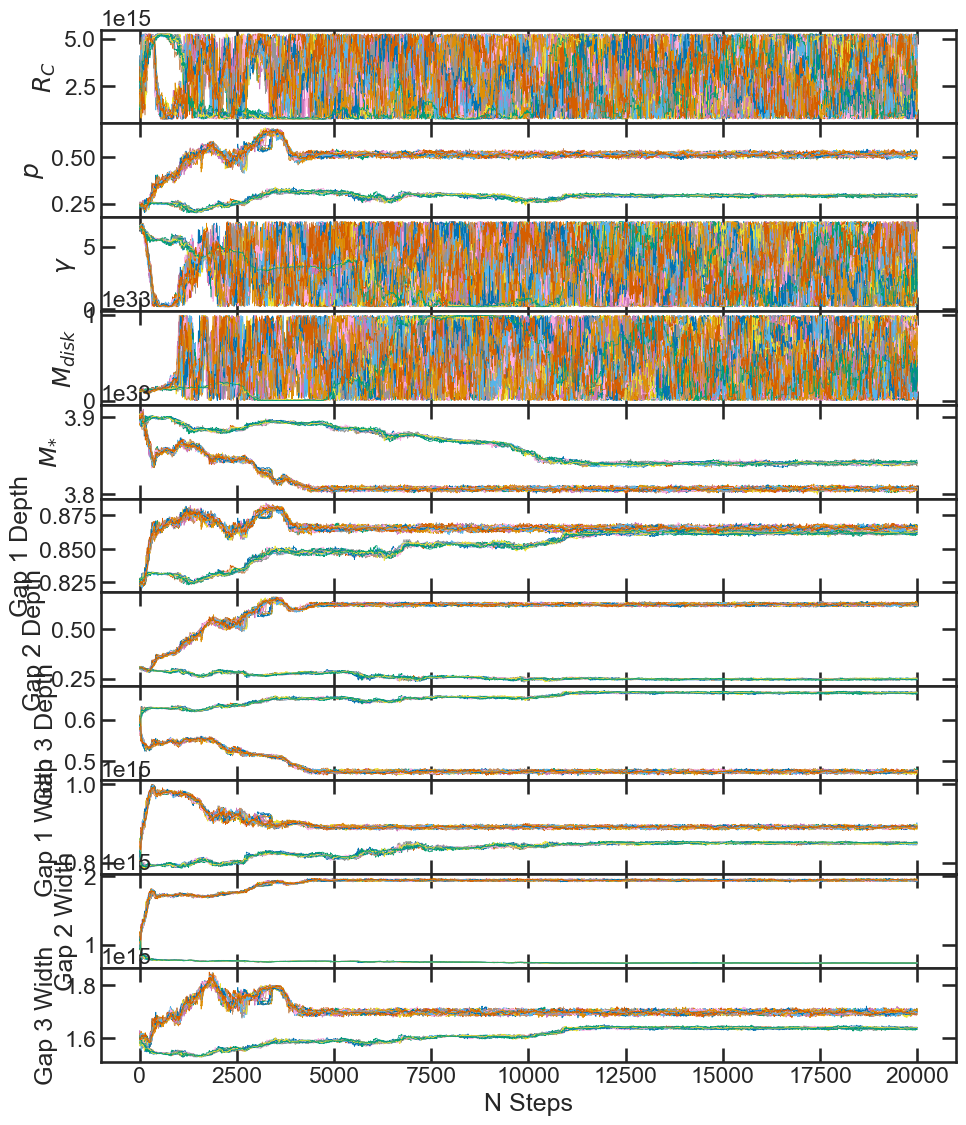

In [3]:
p.plot_walkers(chain)

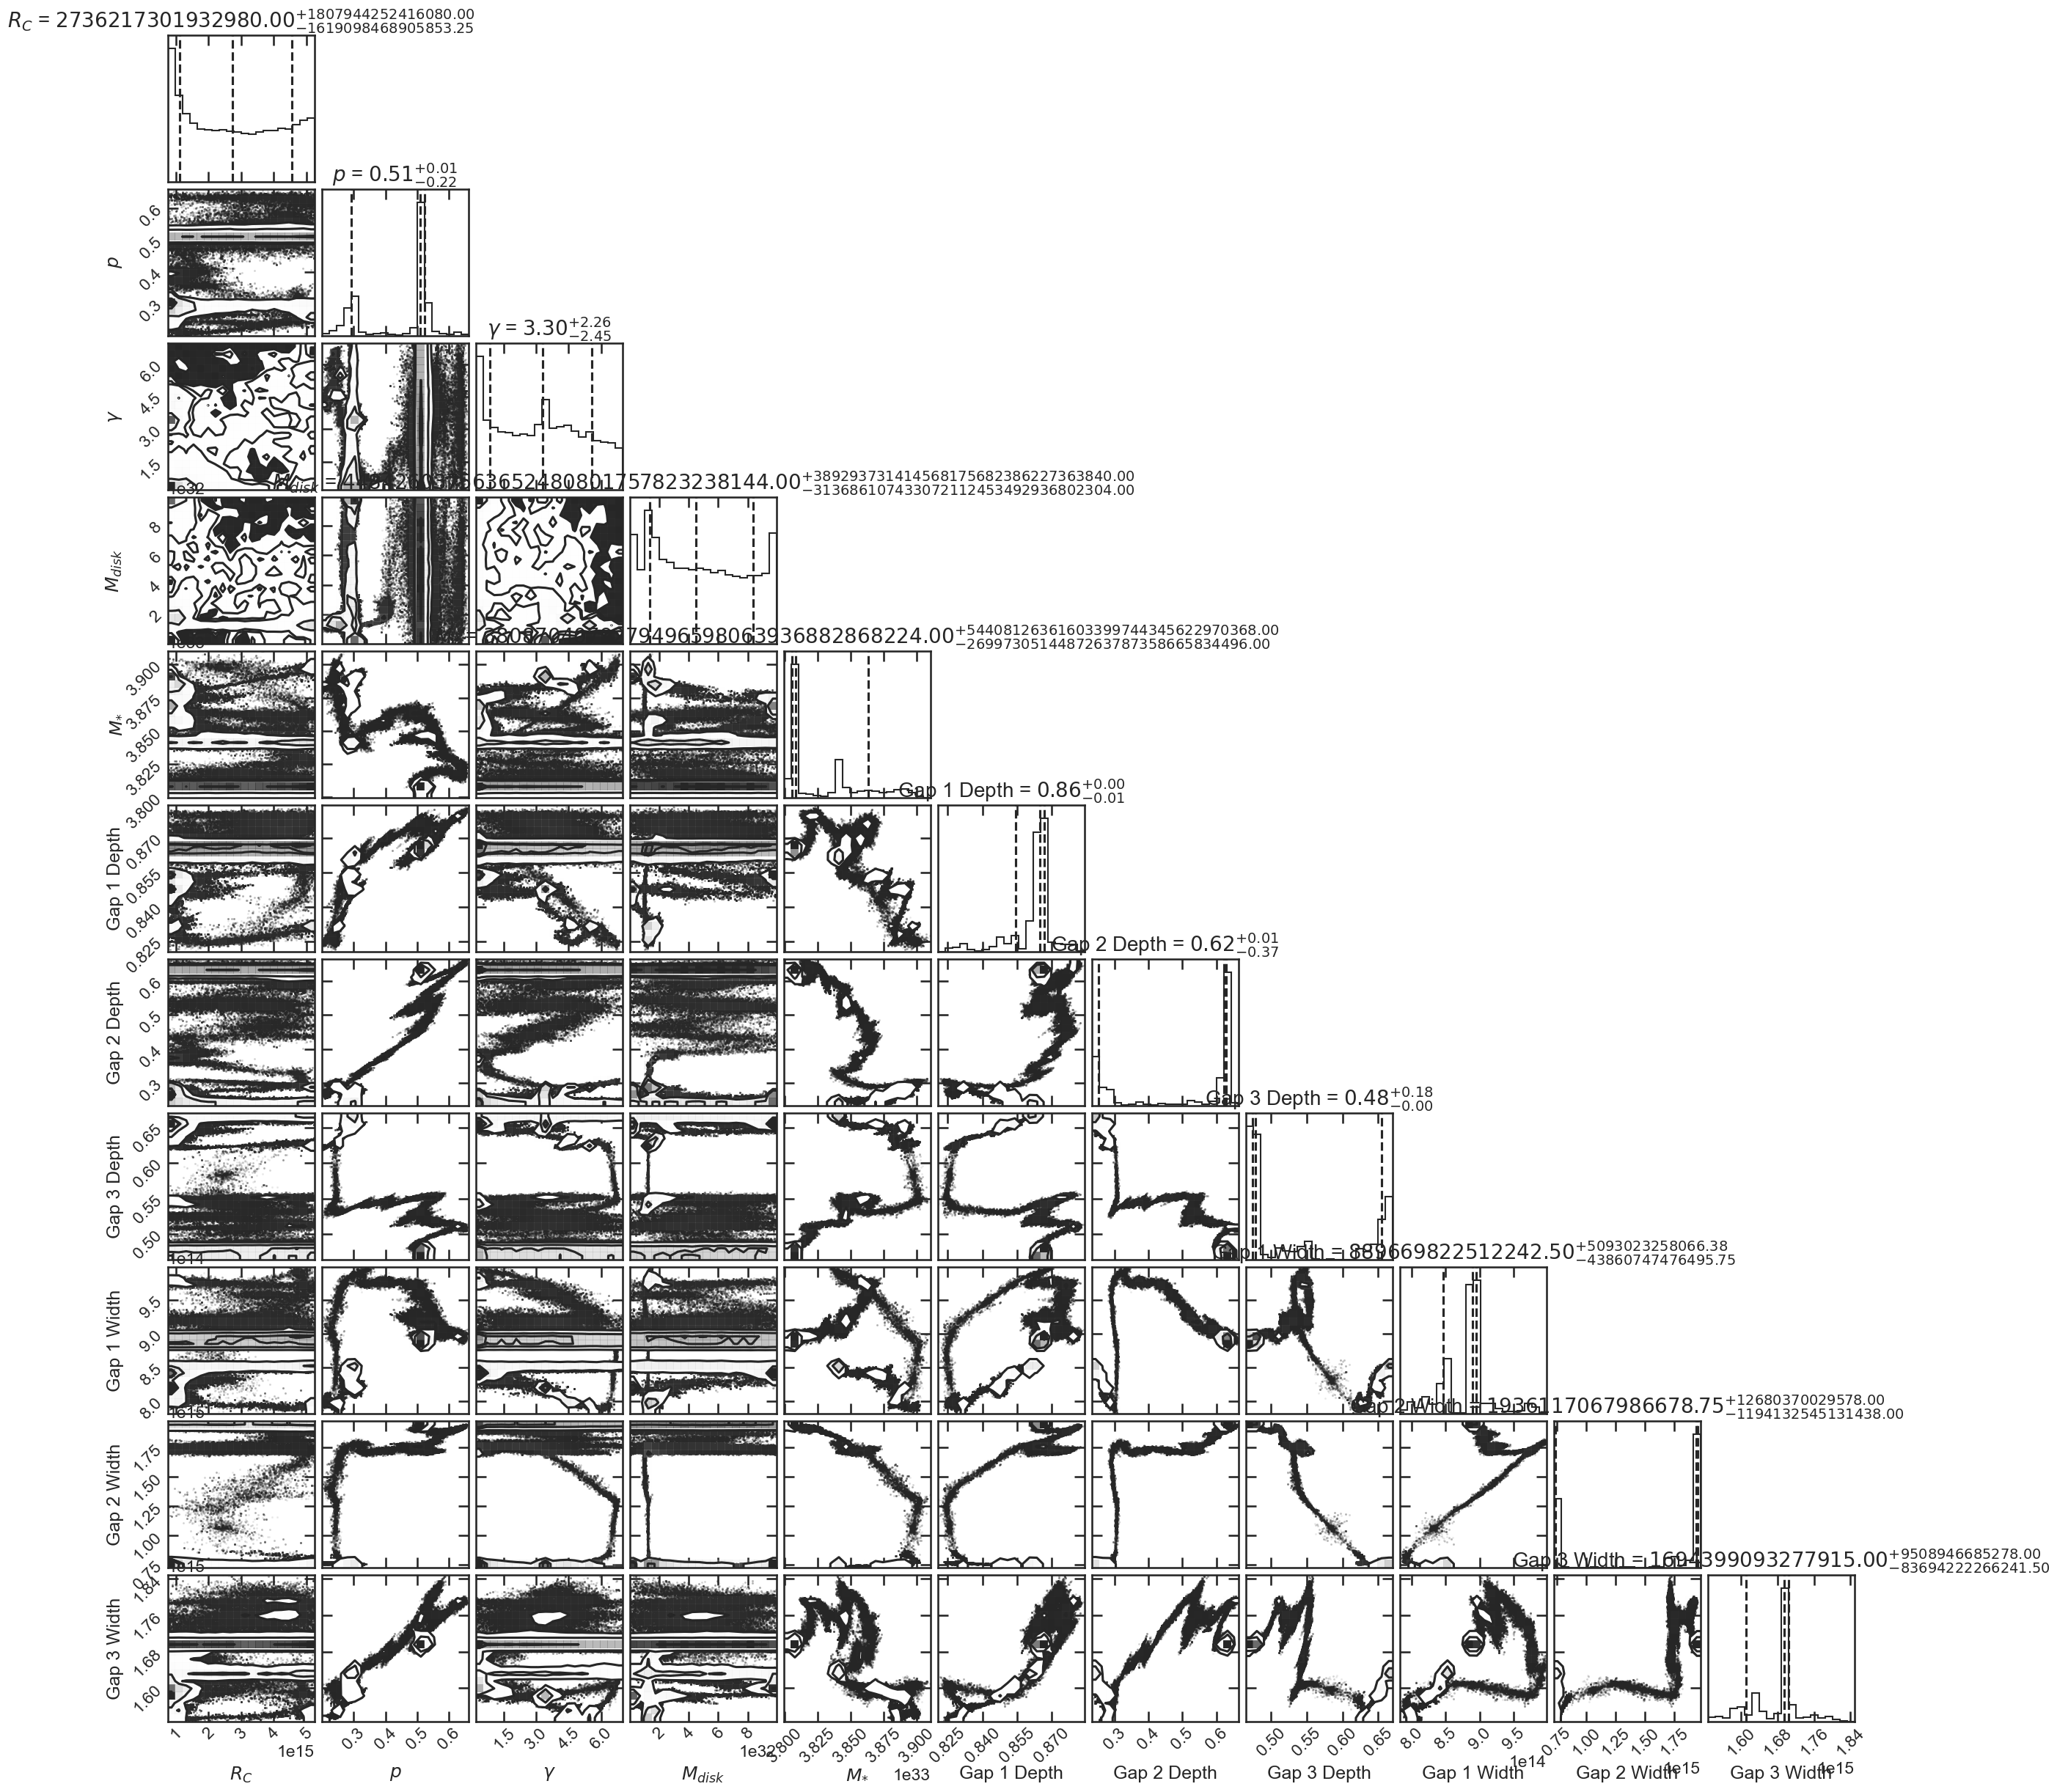

In [4]:
p.plot_corner(chain)

## Compare to data

In [5]:
 # Load T_profile grid (Anna)
AU = 1.5e13  # 1 au = 1.5e13 cm
rs, zs, T_profile = np.load('../ancillary/hd163296_exponential.npy')
r_T = rs[0, :] * AU
z_T = zs[:, 0] * AU
T_profile[T_profile > 1000] = 1000

# r_profile for the model (a fine radial grid)
r_profile = np.linspace(20, 350, 2000) * AU


# Data
surf = np.load('/Users/jea/HD163296/surf_data/HD163296_CO.robust_0.5_ideal.npz')

# Put in cgs units
r_surf = surf['rr1'] * 101 * AU
z_surf = surf['rz1'] * 101 * AU

v_data = np.load('/Users/jea/HD163296/velocity_tests/velocity_curve_CO_iters5_fitmethodSHO.npz')
r_vel = v_data["r"] * 101 * AU
v_vel = v_data["v"] * 100
dv_vel = v_data["dv"] * 100
z_profile = np.interp(r_profile, r_surf, z_surf)
z_data = np.interp(r_vel, r_surf, z_surf)

v_data_corr = (v_vel) * v_corr_func_mod(r_vel / AU)
v_data = residual_velocity_model(r_vel, z_data, v_data_corr, 4.14053690e+33)
dv_data_corr = (dv_vel) * v_corr_func_mod(r_vel / AU)

r_gap_center = [48*AU, 86*AU, 145*AU]

In [9]:
v_model_fits_100 = [p.select_random_model(chain, r_profile, z_profile, r_T, z_T, T_profile, r_gap_center) for i in range(1000)]



/Users/jea/densedisk/densedisk/diskmodel.py:138: RuntimeWarning: invalid value encountered in sqrt
  vphi = np.sqrt(v_star_squared + epsilon_p)


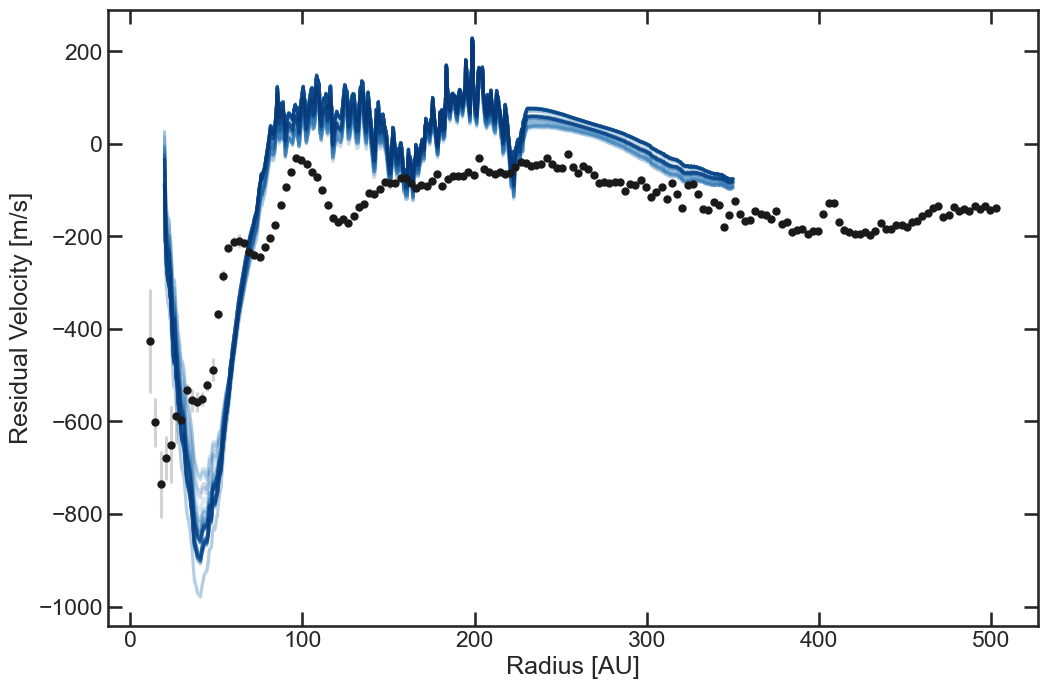

In [10]:
# Plot data
plt.errorbar(r_vel / AU, v_data / 100, yerr=dv_data_corr/100,
             fmt='o', color='k', ecolor='lightgrey', label="Observed", ms=5, linestyle='None')

# Create a colormap from light red to dark red
cmap = plt.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.0, 1, 100)]

# Plot fits
for f, color in zip(v_model_fits_100, colors):
    plt.plot(r_profile/AU, f/100, color=color, alpha = 0.2)
    
    
plt.xlabel('Radius [AU]')
plt.ylabel('Residual Velocity [m/s]')
plt.savefig("mcmc_velocity_fit_20000walkers.pdf")



In [8]:
4.14053690e+33/ 2e33

2.07026845